In [1]:
import speakeazy

In [2]:
spectrum = speakeazy.Data(spectrum_file='../data/macs0417.1208_340.v0.spec.fits',photometry_file=None,run_ID=1,phot_id=None)

spec1d found
Reading in spectrum with grating prism/clear combination
No photometry found


In [3]:
test_priors = speakeazy.priors.Priors(spectrum)

In [4]:
test_priors.params

{'z_in': None,
 'z_range': [0.0, 6.0],
 'scale_disp': 1.3,
 'vel_width': 100.0,
 'vel_width_broad': 300.0,
 'fix_ns': True,
 'nspline': 13,
 'epoly': 3,
 'scale_p': False,
 'ppoly': 0,
 'halpha_prism': 'free',
 'broadlines': False}

In [5]:
test_priors.params['z_range']=[0.5,1.5]

In [6]:
fit = speakeazy.fitting.Fitter(spectrum,test_priors)

In [7]:
fit.fit_redshift_chisq()

0it [00:00, ?it/s]

256it [00:15, 16.05it/s]
101it [00:04, 24.98it/s]


36 oktemp
full chi2 = 548203.0471258926, cont chi2 = 9936468.90517487
z : 1.4621933694354214
vel_width : 100.0
scale_disp : 1.3
escale_0 : 1.0
escale_1 : 1.0
escale_2 : 1.0
line Hb : 84.1035245026422
line Hg : 94.0757751880759
line Hd : 171.11433100554422
line NII : 2142.329378561314
line NeIII-3968 : 99.20308904244276
line OIII : 322.8602664288818
line OII : 62.12188730874534
line HeI-3889 : 116.79707936021481
line SII : 254.18869496756844
line OII-7325 : 38.261338766636236
line SIII-9068 : 182.5709580518905
line SIII-9531 : 129.65488467494774
line OI-6302 : 131.15180027475748
line PaD : 93.22843077145296
line PaG : 14.258469208995333
line PaB : 196.86291643054477
line PaA : 397.22203429514644
line HeI-1083 : 270.0706556841718
line BrD : 33.27661137353445
line Pa8 : 147.20115069596153
line Pa9 : 28.94825717610436
line Pa10 : 32.62299786957272
line MgII : 12.978307629409267
bspl_0 : 0.7686972322765324
bspl_1 : 1.5778290453473438
bspl_2 : 5.5314046880783385
bspl_3 : 4.889415801348367
bs

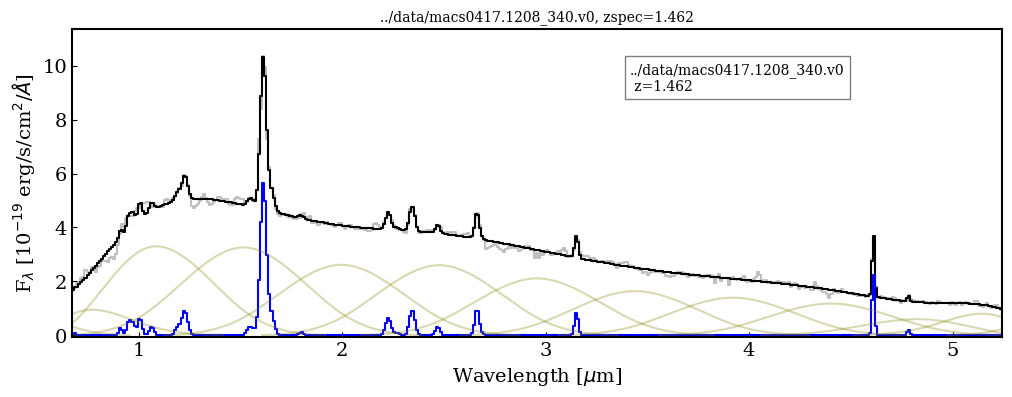

In [8]:
fit.plot_spectrum(save=False)

In [9]:
sampler = speakeazy.sampling.Sampler(spectrum,test_priors,fit)

In [10]:
sampler.run_emcee()

initalising walkers using covar matrix
[[1.46084798e+00 6.72178889e+02 1.50943436e+00 ... 9.98776024e-01
  1.33528177e+00 5.39945243e-01]
 [1.45029340e+00 3.19778784e+01 1.28361864e+00 ... 9.99857697e-01
  1.33635388e+00 5.38686961e-01]
 [1.46198558e+00 7.28808460e+02 1.25989361e+00 ... 9.98349831e-01
  1.33766229e+00 5.35049424e-01]
 ...
 [1.46374194e+00 9.95255026e+02 1.29871238e+00 ... 9.99193169e-01
  1.33800885e+00 5.34528412e-01]
 [1.46491411e+00 1.27395777e+02 1.37457757e+00 ... 9.96435470e-01
  1.33942240e+00 5.29447515e-01]
 [1.46070666e+00 1.60028649e+02 1.32907367e+00 ... 9.99616757e-01
  1.33618316e+00 5.41078689e-01]]
[[1.46084798e+00 6.72178889e+02 1.50943436e+00 ... 9.98776024e-01
  1.33528177e+00 5.39945243e-01]
 [1.45029340e+00 3.19778784e+01 1.28361864e+00 ... 9.99857697e-01
  1.33635388e+00 5.38686961e-01]
 [1.46198558e+00 7.28808460e+02 1.25989361e+00 ... 9.98349831e-01
  1.33766229e+00 5.35049424e-01]
 ...
 [1.46374194e+00 9.95255026e+02 1.29871238e+00 ... 9.991931

100%|██████████| 10/10 [00:19<00:00,  1.96s/it]

Multiprocessing took 23.6 seconds


(10, 126)


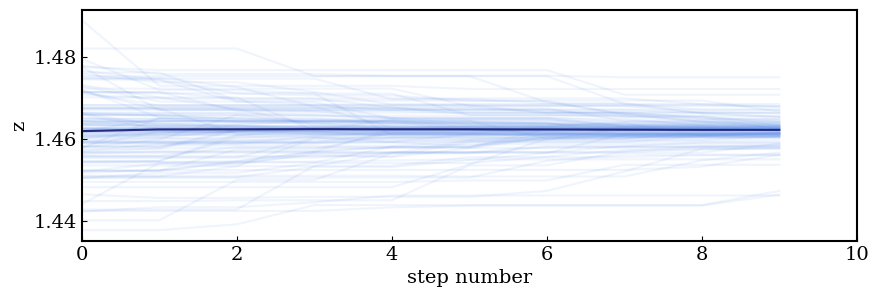

(10, 126)


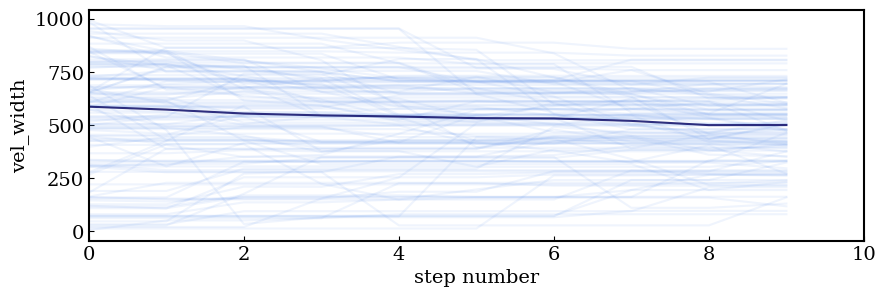

(10, 126)


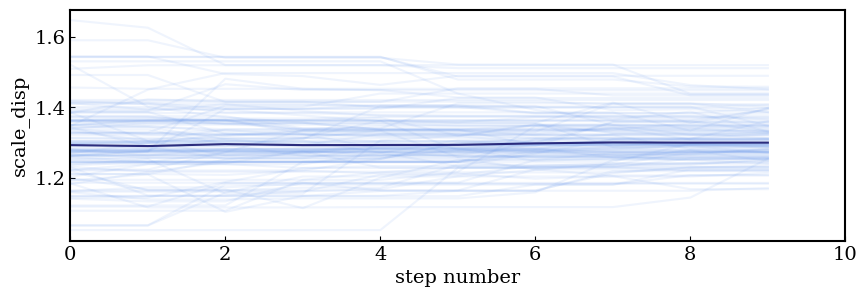

(10, 126)


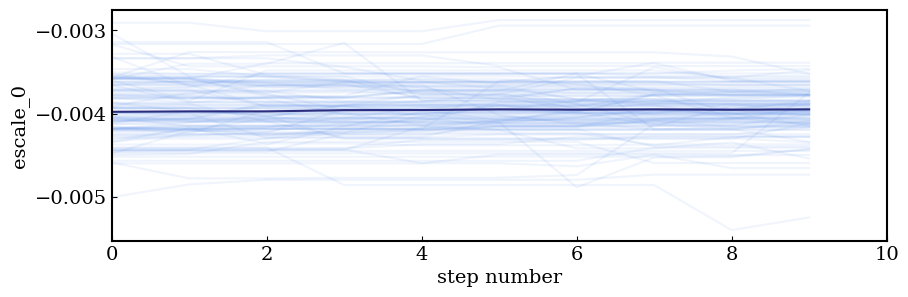

(10, 126)


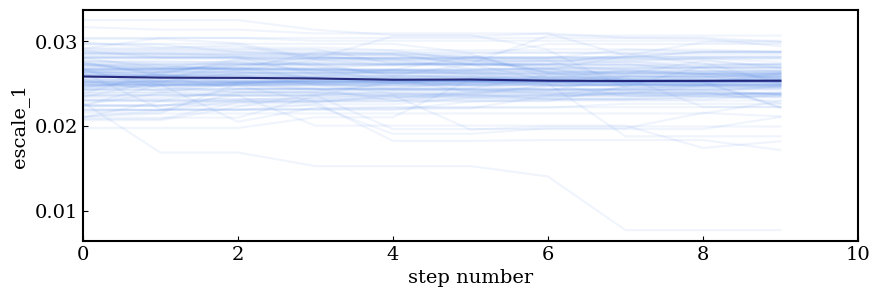

(10, 126)


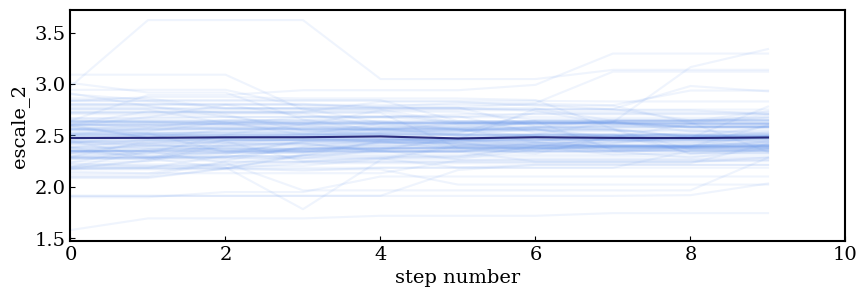

(10, 126)


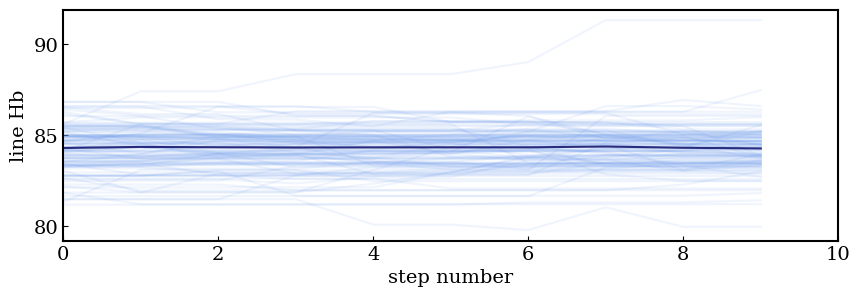

(10, 126)


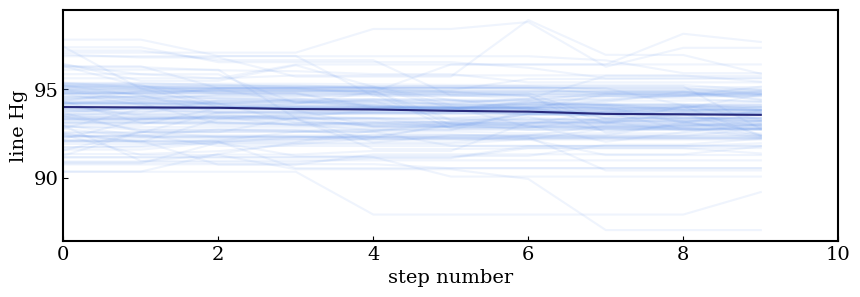

(10, 126)


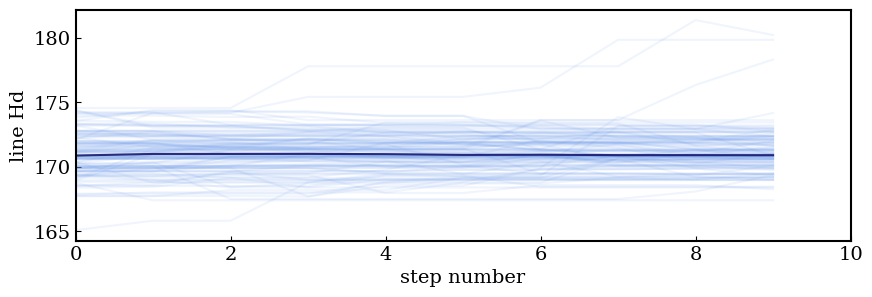

(10, 126)


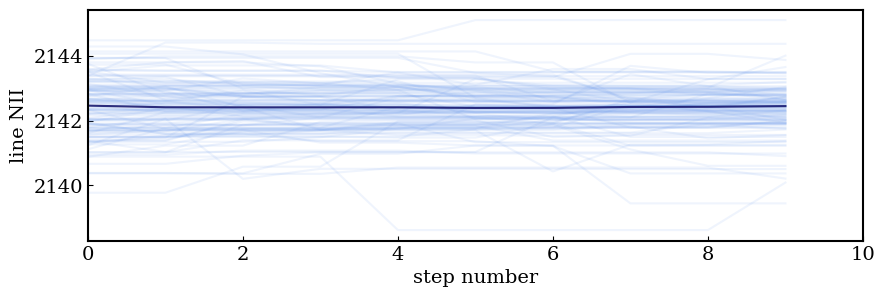

(10, 126)


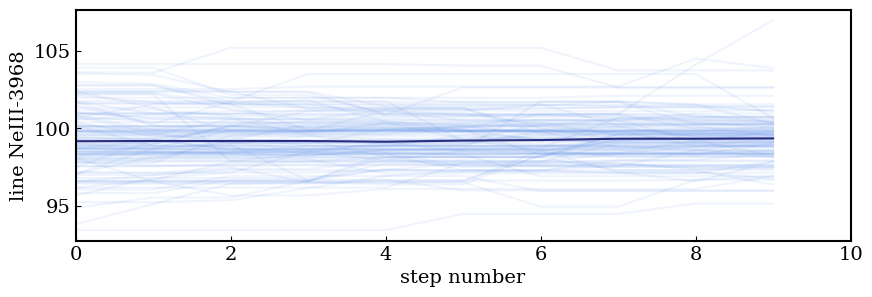

(10, 126)


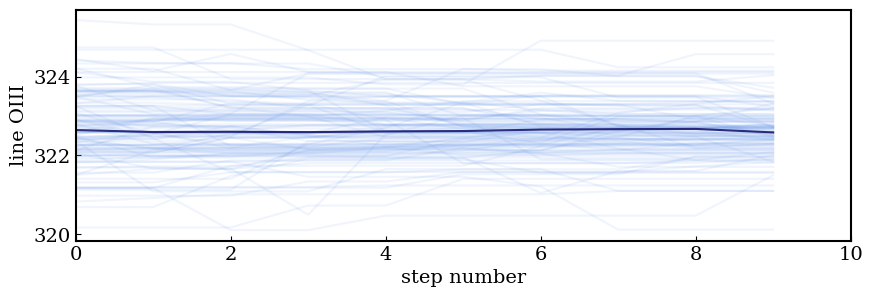

(10, 126)


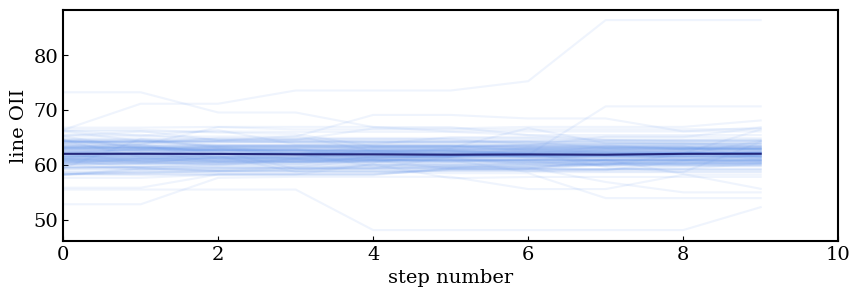

(10, 126)


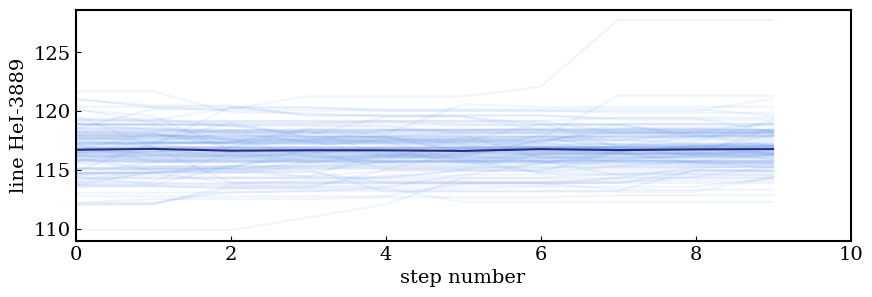

(10, 126)


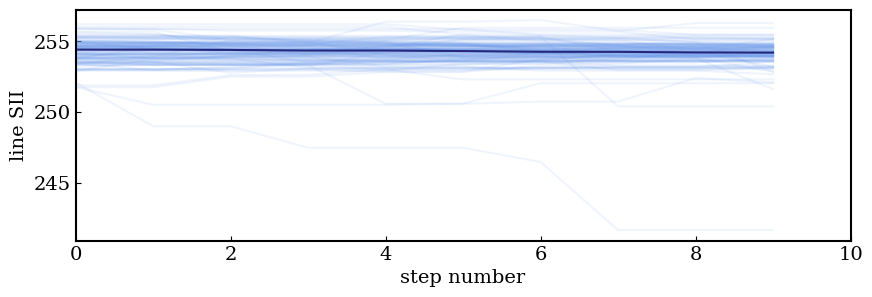

(10, 126)


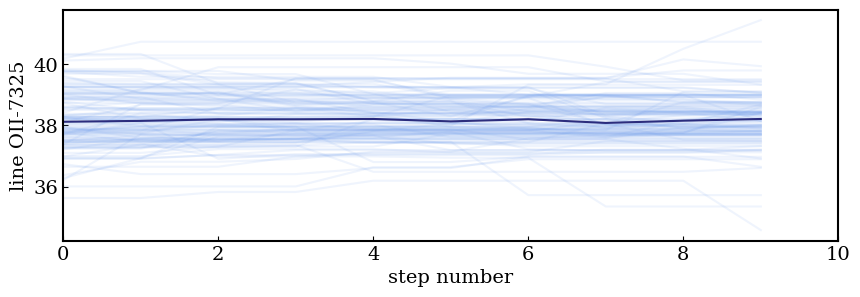

(10, 126)


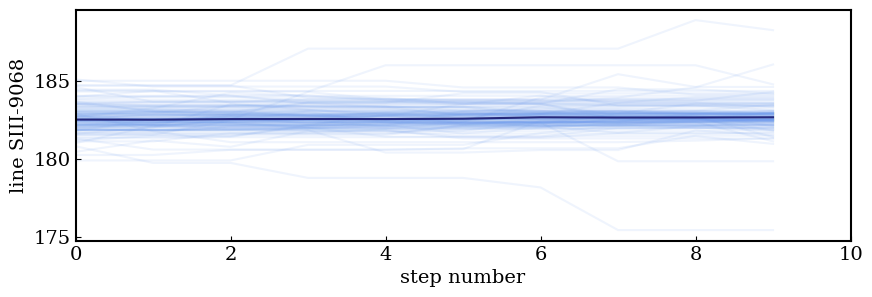

(10, 126)


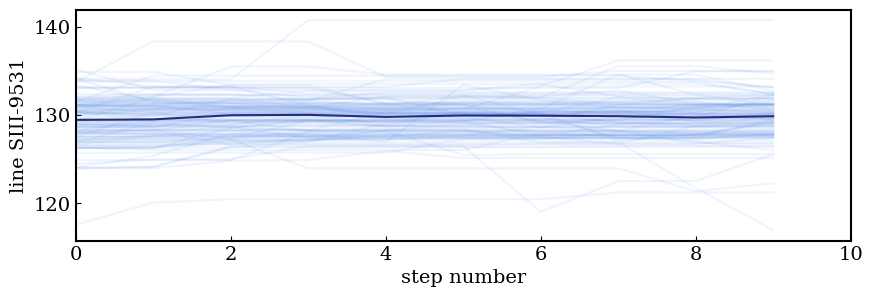

(10, 126)


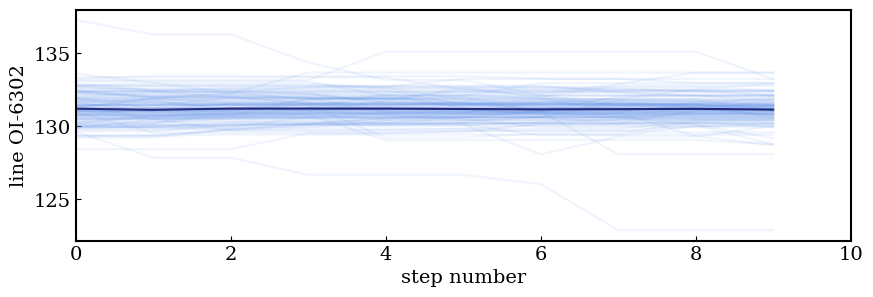

(10, 126)


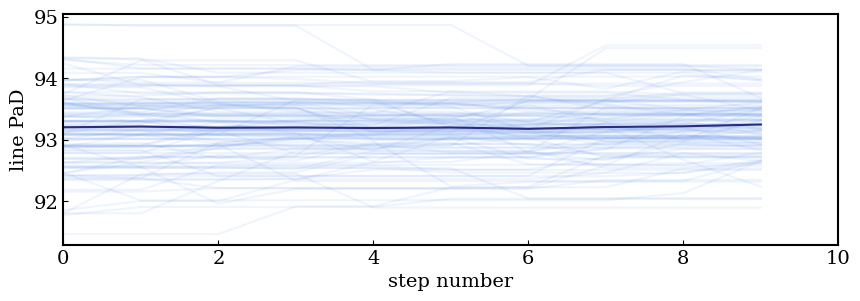

(10, 126)


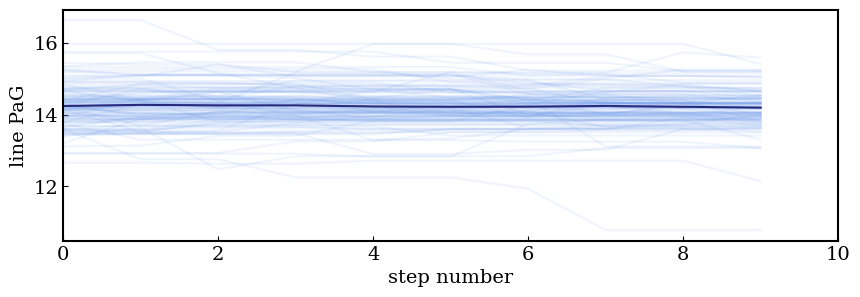

(10, 126)


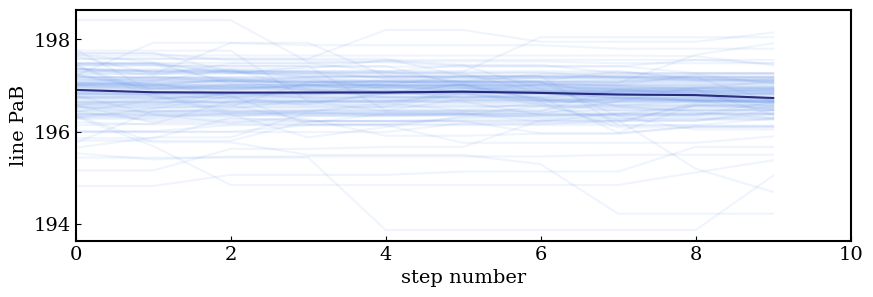

(10, 126)


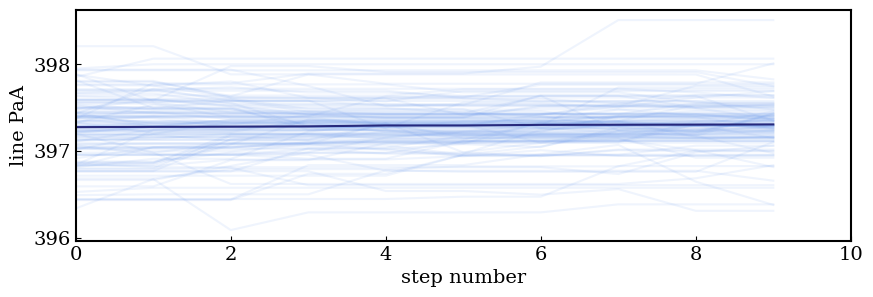

(10, 126)


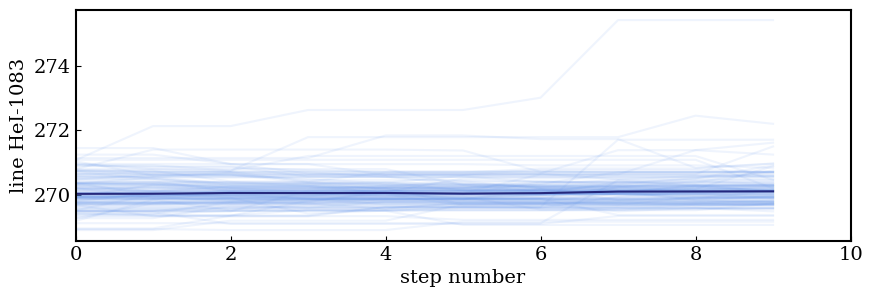

(10, 126)


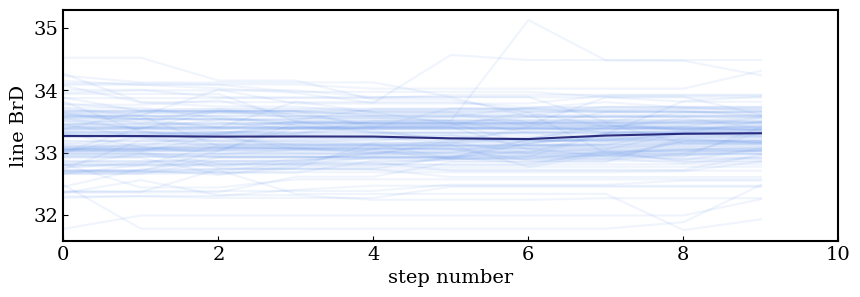

(10, 126)


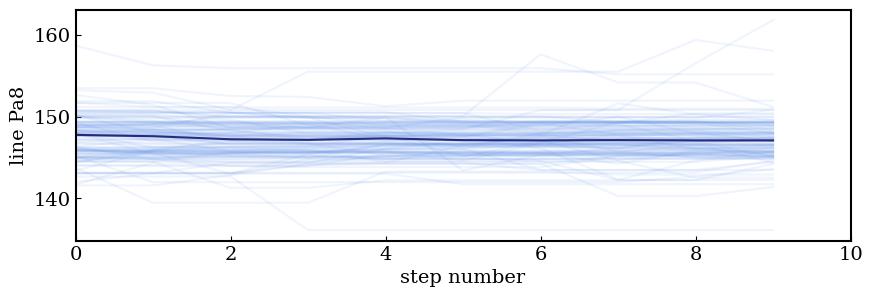

(10, 126)


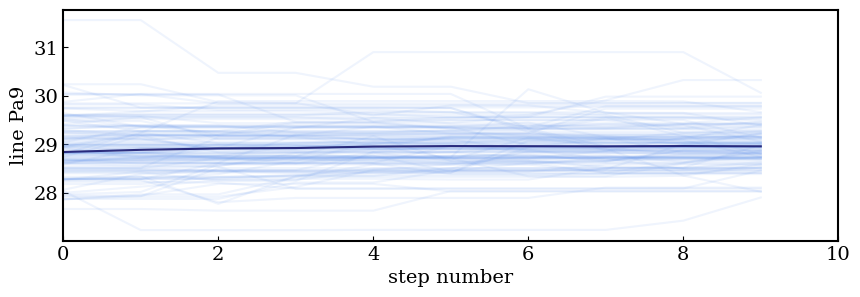

(10, 126)


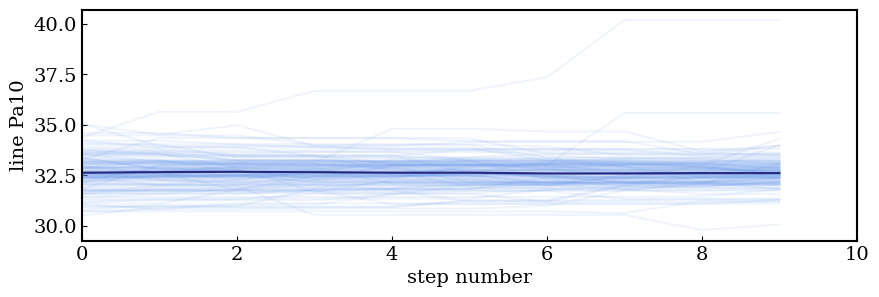

(10, 126)


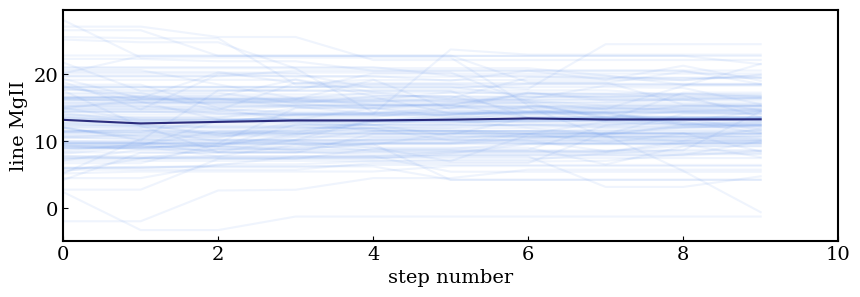

(10, 126)


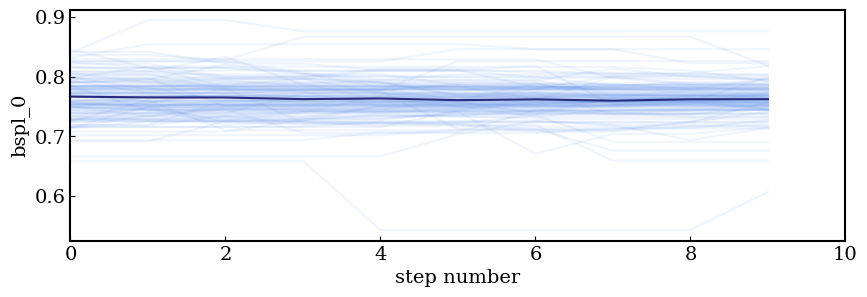

(10, 126)


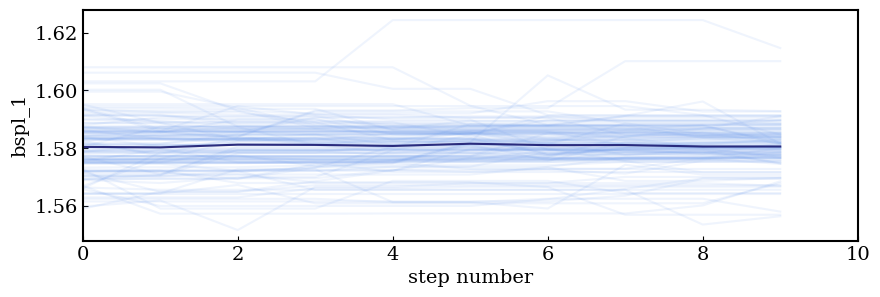

(10, 126)


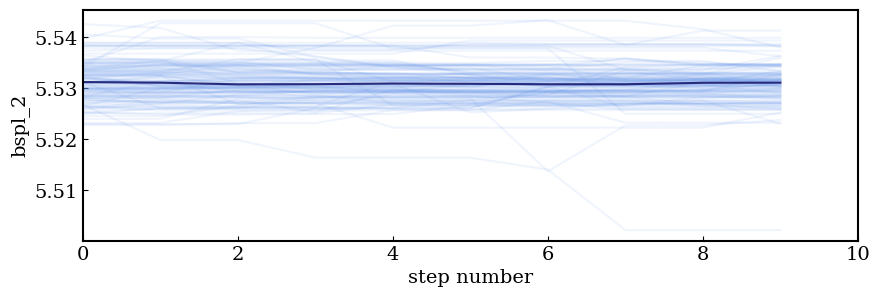

(10, 126)


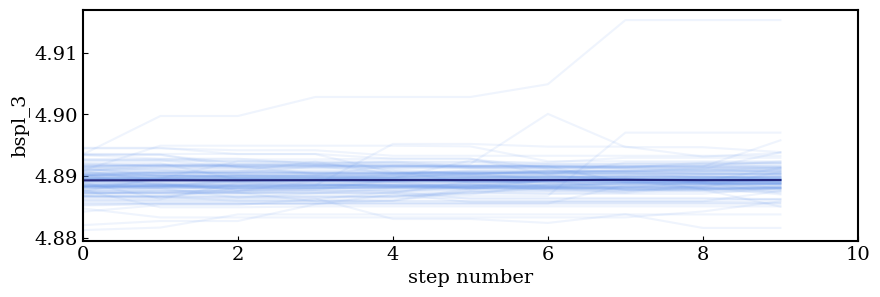

(10, 126)


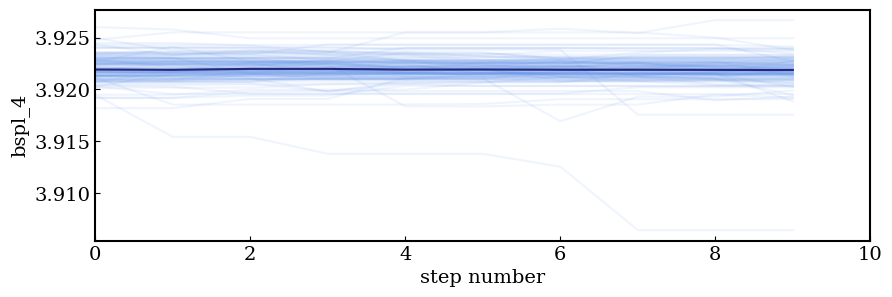

(10, 126)


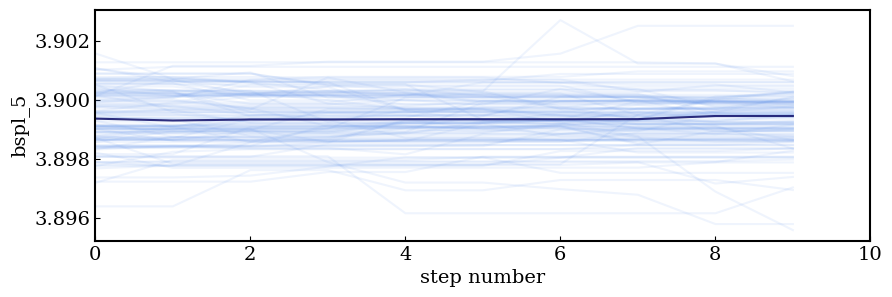

(10, 126)


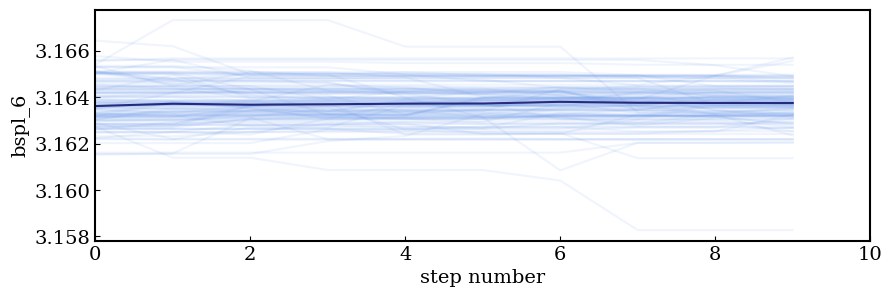

(10, 126)


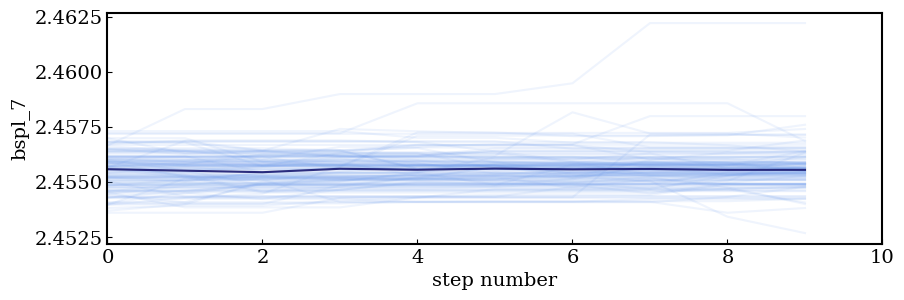

(10, 126)


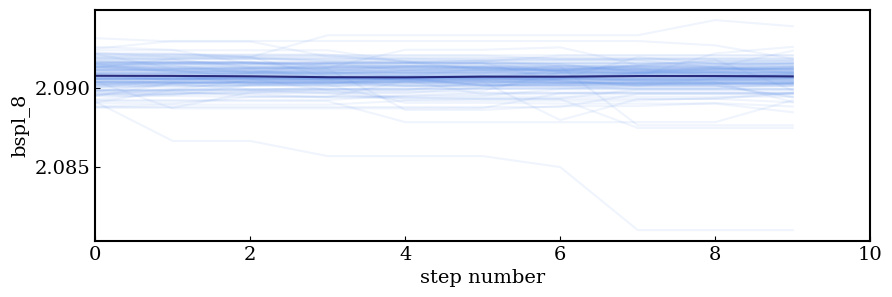

(10, 126)


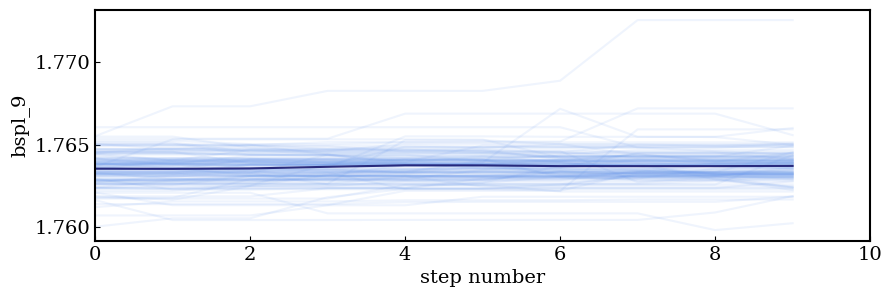

(10, 126)


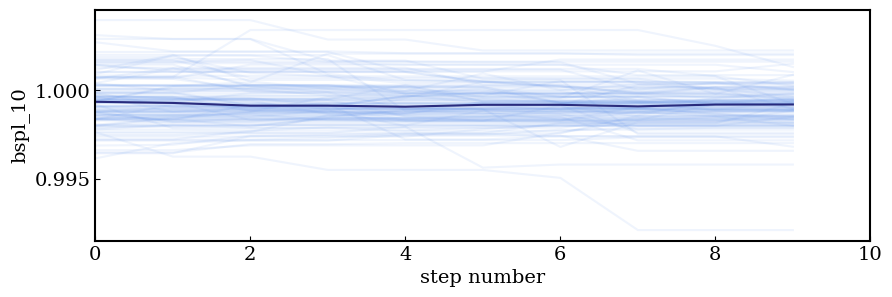

(10, 126)


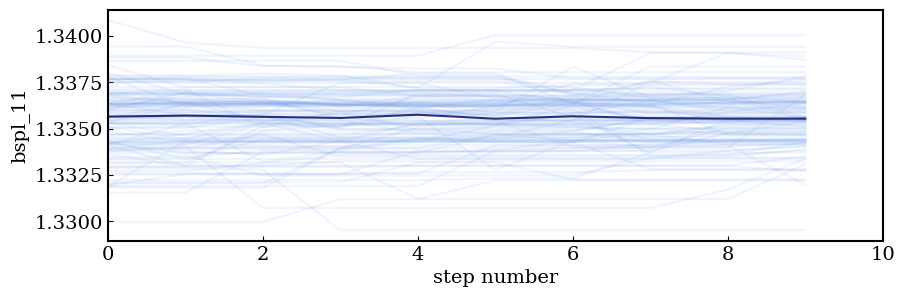

(10, 126)


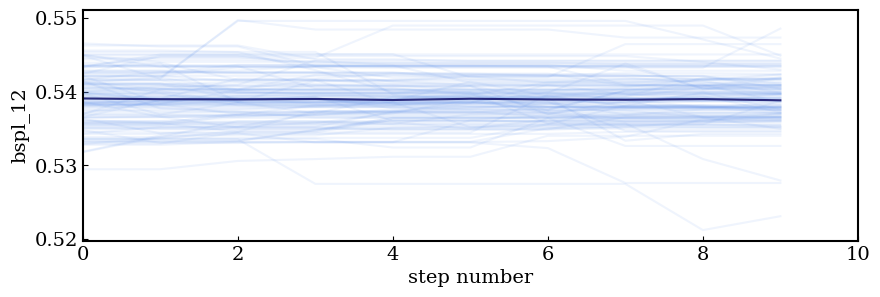

In [11]:
samples = sampler.read_samples(burnin=1,thin=1,flat=True,plot_walkers=True)

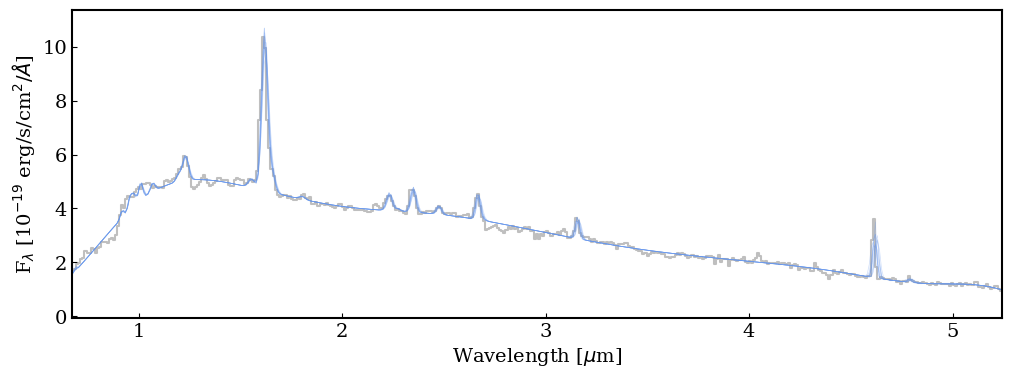

In [12]:
sampler.plot_models(flat_samples=samples)

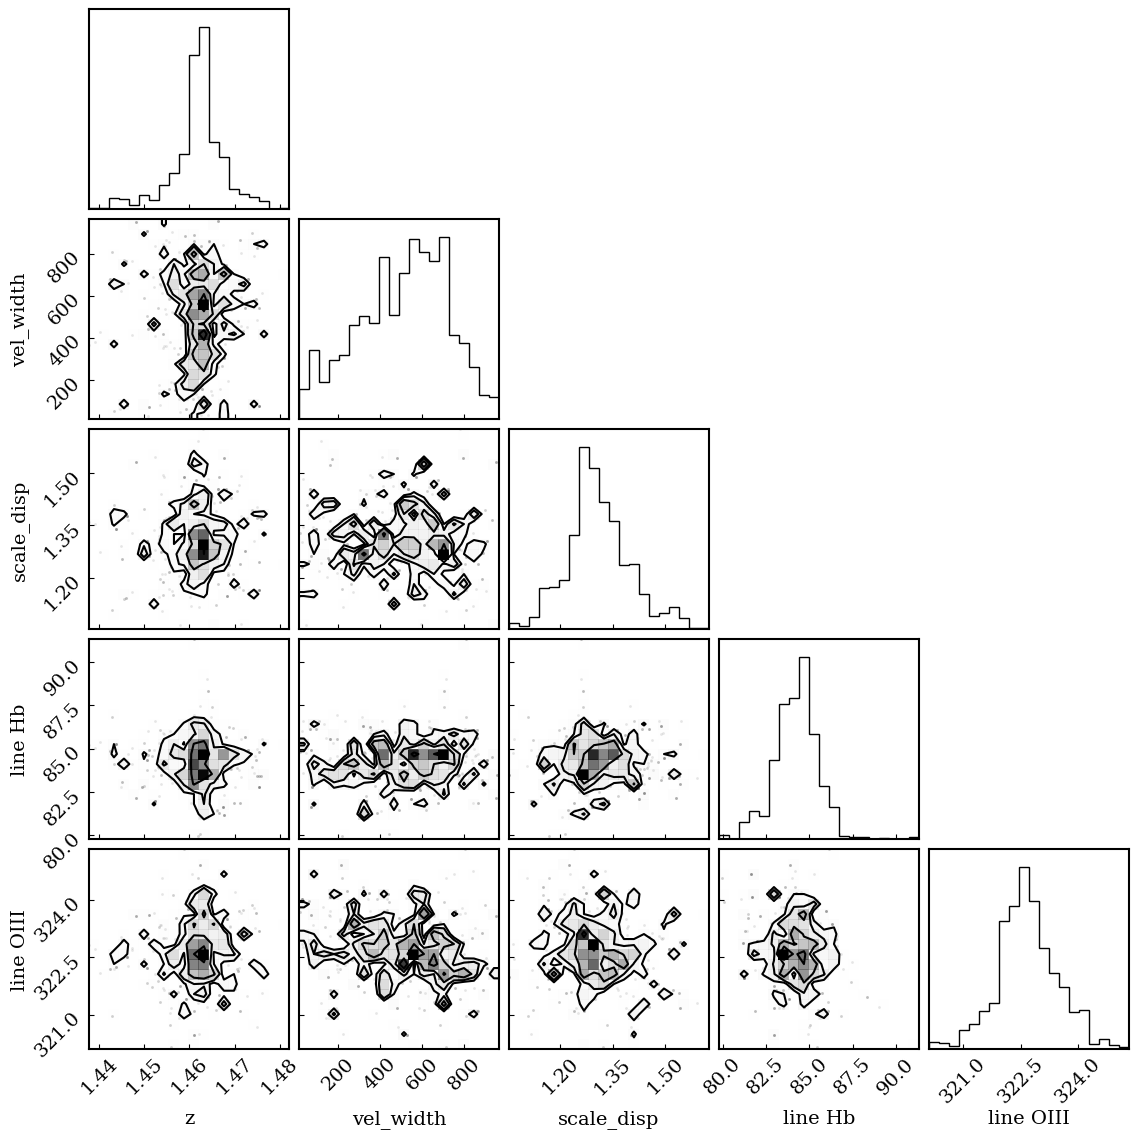

In [13]:
sampler.plot_corner(flat_samples=samples,labs=['z','vel_width','scale_disp', 'line Hb','line OIII'])